In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./Heart Attack.csv")
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


## Determine para os atributos numéricos quais dados são considerados outliers se você usar IQR e 3 desvios padrões. Existem pontos que são classificados como outliers por apenas um dos métodos?

Analisando o atributo numérico da idade, usarei métodos diferentes para classificar os outliers

1) Limite inferior: Q1 - 1,5*DIQ, Limite superior: Q3 + 1,5*DIQ
2) Limite inferior: Q1 - 3*DIR, Limite superior: Q3 + 3*DIQ

In [4]:
q1 = np.percentile(df['age'], 25)
q2 = np.percentile(df['age'], 50)
q3 = np.percentile(df['age'], 75)
DIQ = q3 - q1

limiteInferior = q1 - 1.5*DIQ
limiteSuperior = q3 + 1.5*DIQ

outliersInf = df.loc[df['age'] <= limiteInferior]
DIQindicesOutlierInf = outliersInf.index

print("Outliers Inferior")
print(df['age'].loc[DIQindicesOutlierInf])

print()

outliersSup = df.loc[df['age'] >= limiteSuperior]
DIQindicesOutlierSup = outliersSup.index

print("Outliers Superior")
print(df['age'].loc[DIQindicesOutlierSup])

Outliers Inferior
97      19
109     20
500     19
604     20
899     14
1269    19
Name: age, dtype: int64

Outliers Superior
896     100
1039    103
1126    103
Name: age, dtype: int64


In [5]:
desvioIdade = df['age'].std()

outliersInf = df.loc[df['age'] <= 3*desvioIdade]
indicesOutlierInf = outliersInf.index

print("Outliers Inferior")
print(df['age'].loc[indicesOutlierInf])

print()

outliersSup = df.loc[df['age'] >= 3*desvioIdade]
indicesOutlierSup = outliersSup.index

print("Outliers Superior")
print(df['age'].loc[indicesOutlierSup])

Outliers Inferior
1       21
6       32
18      37
23      30
31      35
        ..
1280    31
1283    36
1284    29
1286    35
1302    40
Name: age, Length: 176, dtype: int64

Outliers Superior
0       64
2       55
3       64
4       55
5       58
        ..
1314    44
1315    66
1316    45
1317    54
1318    51
Name: age, Length: 1143, dtype: int64


Como observado há uma diferença grande entre usar a Distância Interquantil ou 3 desvios padrões para determinar os outliers e muitos pontos são considerados outliers usando 3 desvios padrões como limite.

## Se você remover os outliers, como isso afeta as medidas de posição e dispersão que você obteve na tarefa 1?

Usando a Distância Interquantil para determinar os outliers, irei remover as instâncias 

In [6]:
df2 = df.drop(DIQindicesOutlierInf.append(DIQindicesOutlierSup).array)
df2.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


<Axes: ylabel='Frequency'>

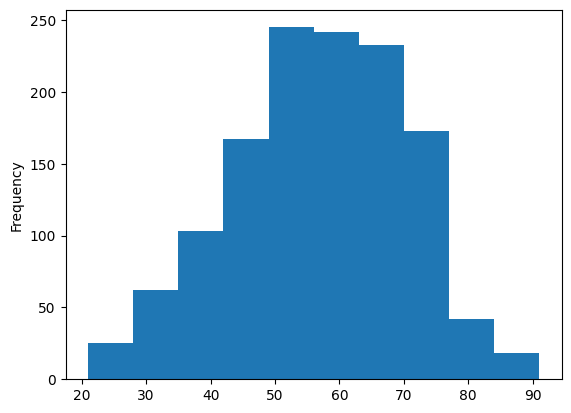

In [7]:
df2['age'].plot.hist()

<Axes: >

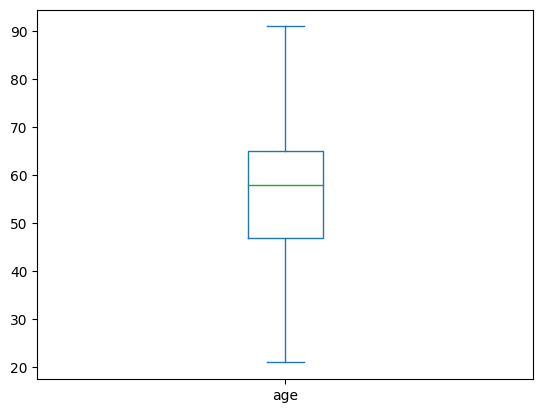

In [8]:
df2['age'].plot.box()

O histograma parece ter ficado mais homogênio no centro e o boxplot, como esperado, sem outliers

## Existem atributos que possuem variância zero ou próxima de zero?

In [9]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


Como a menor variância é próxima de 0,5, então não.

## Caso o seu dataset contenha valores NaN, decida se estes valores devem ser preenchidos pela média ou pela mediana. Justifique sua escolha. 

In [10]:
df.isnull().any()

age              False
gender           False
impluse          False
pressurehight    False
pressurelow      False
glucose          False
kcm              False
troponin         False
class            False
dtype: bool

In [11]:
df.isna().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

O dataset não possui valores NaN ou null

## Verifique se existem dados duplicados. 

In [12]:
df.duplicated().sum()

0

O dataset não possui dados duplicados

## Para os atributos numéricos, faça: (a) normalização; (b) padronização; (c) padronização com IQR

In [13]:
# (a) Normalização
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
df_normalized = df.copy()
columns = ['age', 'gender',	'impluse',	'pressurehight',	'pressurelow',	'glucose',	'kcm',	'troponin']
df_normalized[columns] = scaler.fit_transform(df[columns])

In [17]:
df_normalized.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.474065,0.659591,0.053471,0.470556,0.295424,0.220621,0.049898,0.034949
std,0.153341,0.474027,0.047324,0.144324,0.120982,0.148069,0.154589,0.112105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370787,0.000000,0.040330,0.375691,0.206897,0.124506,0.004451,0.000485
50%,0.494382,1.000000,0.049496,0.453039,0.293103,0.160079,0.008439,0.001262
75%,0.573034,1.000000,0.059578,0.558011,0.370690,0.265810,0.018300,0.008205
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df_normalized.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,0.561798,1.0,0.042163,0.651934,0.387931,0.247036,0.004935,0.001068,negative
1,0.078652,1.0,0.067828,0.309392,0.068966,0.515810,0.021453,0.102826,positive
2,0.460674,1.0,0.040330,0.651934,0.336207,0.464427,0.005569,0.000194,negative
3,0.561798,1.0,0.045830,0.430939,0.146552,0.464427,0.045212,0.011749,positive
4,0.460674,1.0,0.040330,0.386740,0.232759,0.523715,0.002533,0.000194,negative


In [19]:
# (b) Padronização
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
df_standardized = df.copy()
columns = ['age', 'gender',	'impluse',	'pressurehight',	'pressurelow',	'glucose',	'kcm',	'troponin']
df_standardized[columns] = scaler.fit_transform(df[columns])

In [21]:
df_standardized.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03
mean,9.965914e-17,-2.693490e-17,5.386981e-17,-2.693490e-16,3.609277e-16,-2.033585e-16,-1.077396e-17,2.020118e-17
std,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00
min,-3.092756e+00,-1.391991e+00,-1.130320e+00,-3.261639e+00,-2.442805e+00,-1.490552e+00,-3.228992e-01,-3.118734e-01
25%,-6.737807e-01,-1.391991e+00,-2.777839e-01,-6.575539e-01,-7.320147e-01,-6.493702e-01,-2.940930e-01,-3.075411e-01
50%,1.325443e-01,7.183954e-01,-8.402558e-02,-1.214187e-01,-1.918532e-02,-4.090325e-01,-2.682884e-01,-3.006095e-01
75%,6.456602e-01,7.183954e-01,1.291085e-01,6.061934e-01,6.223611e-01,3.053043e-01,-2.044786e-01,-2.386580e-01
max,3.431147e+00,7.183954e-01,2.000871e+01,3.669823e+00,5.826015e+00,5.265606e+00,6.148319e+00,8.611732e+00


In [25]:
df_standardized.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,0.572358,0.718395,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342,negative
1,-2.579640,0.718395,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701,positive
2,-0.087363,0.718395,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140,negative
3,0.572358,0.718395,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,positive
4,-0.087363,0.718395,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,negative


In [22]:
from sklearn.preprocessing import RobustScaler

In [23]:
scaler = RobustScaler()
df_robuste_normalized = df.copy()
columns = ['age', 'gender',	'impluse',	'pressurehight',	'pressurelow',	'glucose',	'kcm',	'troponin']
df_robuste_normalized[columns] = scaler.fit_transform(df[columns])

In [24]:
df_robuste_normalized.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,-0.100455,-0.340409,0.206506,0.096078,0.014165,0.428452,2.993809,4.364055
std,0.758184,0.474027,2.458584,0.791598,0.738628,1.047875,11.163153,14.522864
min,-2.444444,-1.000000,-2.571429,-2.484848,-1.789474,-1.132867,-0.609398,-0.163522
25%,-0.611111,-1.000000,-0.476190,-0.424242,-0.526316,-0.251748,-0.287952,-0.100629
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.388889,0.000000,0.523810,0.575758,0.473684,0.748252,0.712048,0.899371
max,2.500000,0.000000,49.380952,3.000000,4.315789,5.944056,71.602410,129.383648


In [26]:
df_robuste_normalized.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,0.333333,0.0,-0.380952,1.090909,0.578947,0.615385,-0.253012,-0.025157,negative
1,-2.055556,0.0,0.952381,-0.787879,-1.368421,2.517483,0.939759,13.157233,positive
2,-0.166667,0.0,-0.476190,1.090909,0.263158,2.153846,-0.207229,-0.138365,negative
3,0.333333,0.0,-0.190476,-0.121212,-0.894737,2.153846,2.655422,1.358491,positive
4,-0.166667,0.0,-0.476190,-0.363636,-0.368421,2.573427,-0.426506,-0.138365,negative


## Para os atributos categóricos, transforme estes atributos para as 3 formas de transformação apresentada no slide

As 3 formas de transformação são:
(a) Codificação ordinal
(b) One Hot Enconding
(c) Variável dummy

In [30]:
# Codificação ordinal

df_ordinal = df.copy() 
df_ordinal[df_ordinal['class'] == 'positive'] = 1
df_ordinal[df_ordinal['class'] == 'negative'] = 0
df_ordinal.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,0,0,0,0,0,0.0,0.0,0.0,0
1,1,1,1,1,1,1.0,1.0,1.0,1
2,0,0,0,0,0,0.0,0.0,0.0,0
3,1,1,1,1,1,1.0,1.0,1.0,1
4,0,0,0,0,0,0.0,0.0,0.0,0


In [31]:
# One Hot Enconding

df_hot_enconding = df.copy() 
df_hot_enconding[df_hot_enconding['class'] == 'positive'] = [1, 0]
df_hot_enconding[df_hot_enconding['class'] == 'negative'] = [0,0]
df_hot_enconding.head()

ValueError: Must have equal len keys and value when setting with an iterable